In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

2023-11-02 18:31:48.399022: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 18:31:48.402143: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 18:31:48.442046: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-02 18:31:48.442109: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-02 18:31:48.442137: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
classes = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

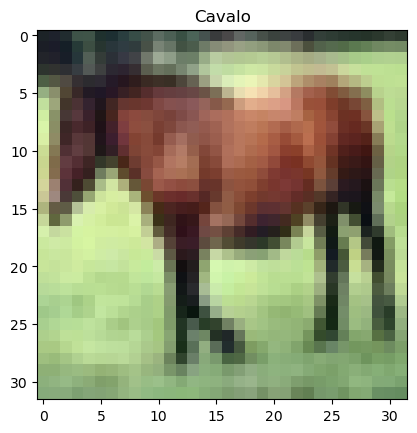

In [5]:
# Teste
plt.imshow(x_train[7])
plt.title(classes[y_train[7][0]])
plt.show()

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# CNN
model = Sequential()

model.add(Conv2D(32, 5, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

opt = RMSprop(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [7]:
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 43s 27ms/step - loss: 1.9318 - accuracy: 0.2868 - val_loss: 1.6589 - val_accuracy: 0.4072
Epoch 2/100
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5899 - accuracy: 0.4204 - val_loss: 1.4500 - val_accuracy: 0.4890
Epoch 3/100
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4609 - accuracy: 0.4720 - val_loss: 1.3432 - val_accuracy: 0.5180
Epoch 4/100
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3772 - accuracy: 0.5051 - val_loss: 1.2787 - val_accuracy: 0.5484
Epoch 5/100
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3081 - accuracy: 0.5319 - val_loss: 1.2110 - val_accuracy: 0.5812
Epoch 6/100
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2593 - accuracy: 0.5521 - val_loss: 1.1695 - val_accuracy: 0.5899
Epoch 7/100
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2118 - accuracy: 0.5705 - val_loss: 1

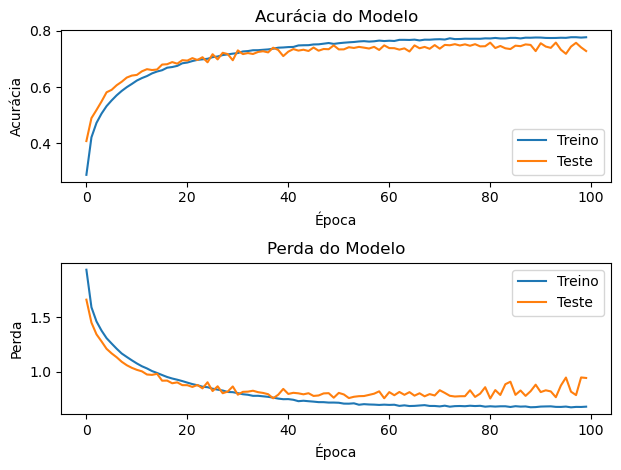

In [8]:
plt.figure(1)

plt.subplot(211)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='lower right')

plt.subplot(212)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper right')

plt.tight_layout()
plt.show()
